# Improved Flight Price Prediction - Dataset Pre_Processing

In [1]:
# changing the default working directory

import os
os.chdir('C:/Users/Ashutosh Kumar Singh/PycharmProjects/Flight Price Prediction System')

# Problem Definition:

To predict the the Price of flight ticket.     

### Hypothesis:
* Date of Journey
* Name of the flight
* Source
* Destination
* Stops
* Time of flight
* Extra Services

### Dataset:
https://github.com/snehanshu17/snehanshuwork/blob/master/Data_Train.xlsx

### Data Manipulation:

##### Importing libraries

In [101]:
import pandas as pd    # using pandas library to work with dataframe

import numpy as np  # using numpy for linear algebra

import matplotlib.pyplot as plt   # using matplotlib for data visualisation

import seaborn as sns    # library for data visualisation

##### reading dataset

In [105]:
# reading dataset in a variable named as a dataframe

dataframe = pd.read_excel('Flight dataset.xlsx', sheet_name = 'Sheet1')

# deep copy of the dataframe to avoid inplace changes

data = dataframe.copy(deep = True)
data.head(25)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


##### attributes of data

In [4]:
# Rows label of the data
print('Index : ',data.index)

# Columns label of the data
print('Columns : ',data.columns)

# Size of the data
print('Size : ',data.size)

# shape of the data
print('Shape : ',data.shape)

data.size

Index :  RangeIndex(start=0, stop=10683, step=1)
Columns :  Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')
Size :  117513
Shape :  (10683, 11)


117513

In [5]:
# data type of each columns

data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Univariate Analysis

##### Here sequence of observations taken sequentially in time i.e per day

In [6]:
#sorting by Date_of_Journey

data.sort_values(by='Date_of_Journey', inplace=True)

In [7]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9848,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
6024,Air India,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,1 stop,1 Long layover,14594
2405,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,1 stop,1 Long layover,22270
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
8308,IndiGo,01/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,12649


In [8]:
data.Timestamp = pd.to_datetime(data.Date_of_Journey,format='%d/%m/%Y') 
data.index = data.Timestamp 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [9]:
# dropping Date_of_Journey column

data.drop(columns=['Date_of_Journey'], inplace=True)

In [10]:
# changing name of index to Date

data.index.names = ['Date']

In [11]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Date,,,,,,,,,,
2019-03-01,Air India,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
2019-03-01,Air India,Banglore,New Delhi,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,1 stop,1 Long layover,14594
2019-03-01,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,1 stop,1 Long layover,22270
2019-03-01,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
2019-03-01,IndiGo,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,12649


In [12]:
data.tail()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Date,,,,,,,,,,
2019-06-09,Jet Airways,Kolkata,Banglore,CCU → DEL → BLR,09:35,22:05,12h 30m,1 stop,No info,14676
2019-06-09,Jet Airways,Kolkata,Banglore,CCU → DEL → BLR,20:25,21:05 10 Jun,24h 40m,1 stop,In-flight meal not included,10539
2019-06-09,Vistara,Kolkata,Banglore,CCU → DEL → BLR,20:20,23:25 10 Jun,27h 5m,1 stop,No info,8085
2019-06-09,GoAir,Banglore,Delhi,BLR → DEL,07:45,10:40,2h 55m,non-stop,No info,3898
2019-06-09,Air India,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 10 Jun,23h 40m,2 stops,No info,11185


In [13]:
# concise information of the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10683 entries, 2019-03-01 to 2019-06-09
Data columns (total 10 columns):
Airline            10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(9)
memory usage: 918.1+ KB


##### renaming columns according to my convention

In [14]:
data.rename(columns={
    'Airline' : 'Name',
    'Source' : 'From',
    'Destination' : 'To',
    'Dep_Time' : 'Departure',
    'Arrival_Time' : 'Arrival',
    'Duration' : 'Time of Flight',
    'Total_Stops' : 'Stops',
    'Additional_Info' : 'Extra Services'
}, inplace=True)

In [15]:
data.head()

,Name,From,To,Route,Departure,Arrival,Time of Flight,Stops,Extra Services,Price
Date,,,,,,,,,,
2019-03-01,Air India,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
2019-03-01,Air India,Banglore,New Delhi,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,1 stop,1 Long layover,14594
2019-03-01,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,1 stop,1 Long layover,22270
2019-03-01,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
2019-03-01,IndiGo,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,12649


##### checking missing values

In [16]:
data.isnull().sum()

Name              0
From              0
To                0
Route             1
Departure         0
Arrival           0
Time of Flight    0
Stops             1
Extra Services    0
Price             0
dtype: int64

In [17]:
#sorting by route

data.sort_values(by='Route').tail()

,Name,From,To,Route,Departure,Arrival,Time of Flight,Stops,Extra Services,Price
Date,,,,,,,,,,
2019-03-15,IndiGo,Chennai,Kolkata,MAA → CCU,05:15,07:35,2h 20m,non-stop,No info,4326
2019-03-24,SpiceJet,Chennai,Kolkata,MAA → CCU,09:30,12:05,2h 35m,non-stop,No check-in baggage included,3807
2019-05-12,Air India,Chennai,Kolkata,MAA → CCU,11:40,13:55,2h 15m,non-stop,No info,4667
2019-05-27,Air India,Chennai,Kolkata,MAA → CCU,11:40,13:55,2h 15m,non-stop,No info,4667
2019-05-06,Air India,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [18]:
# dropping this missing value row   

data.dropna(inplace=True) 
data.sort_values(by='Route').tail()

,Name,From,To,Route,Departure,Arrival,Time of Flight,Stops,Extra Services,Price
Date,,,,,,,,,,
2019-03-27,IndiGo,Chennai,Kolkata,MAA → CCU,07:55,10:15,2h 20m,non-stop,No info,3384
2019-03-15,IndiGo,Chennai,Kolkata,MAA → CCU,05:15,07:35,2h 20m,non-stop,No info,4326
2019-03-24,SpiceJet,Chennai,Kolkata,MAA → CCU,09:30,12:05,2h 35m,non-stop,No check-in baggage included,3807
2019-05-12,Air India,Chennai,Kolkata,MAA → CCU,11:40,13:55,2h 15m,non-stop,No info,4667
2019-05-27,Air India,Chennai,Kolkata,MAA → CCU,11:40,13:55,2h 15m,non-stop,No info,4667


In [19]:
data.isnull().sum()

Name              0
From              0
To                0
Route             0
Departure         0
Arrival           0
Time of Flight    0
Stops             0
Extra Services    0
Price             0
dtype: int64

### Transforming Name

In [20]:
# Checking for unique Value

name = data['Name'].unique()
name

array(['Air India', 'Jet Airways', 'IndiGo', 'Jet Airways Business',
       'Air Asia', 'SpiceJet', 'Vistara', 'GoAir',
       'Vistara Premium economy', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [21]:
# sorting name for label assignments

name.sort()
print(name)

['Air Asia' 'Air India' 'GoAir' 'IndiGo' 'Jet Airways'
 'Jet Airways Business' 'Multiple carriers'
 'Multiple carriers Premium economy' 'SpiceJet' 'Trujet' 'Vistara'
 'Vistara Premium economy']


In [22]:
# changing name datatype

data['Name'] = data['Name'].astype('category')

In [23]:
# Label Encoding of Name

data['Name'] = data['Name'].cat.codes

In [24]:
# Checking for unique Value

data['Name'].unique()

array([ 1,  4,  3,  5,  0,  8, 10,  2, 11,  6,  7,  9], dtype=int64)

In [25]:
data.head()

,Name,From,To,Route,Departure,Arrival,Time of Flight,Stops,Extra Services,Price
Date,,,,,,,,,,
2019-03-01,1,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
2019-03-01,1,Banglore,New Delhi,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,1 stop,1 Long layover,14594
2019-03-01,4,Banglore,New Delhi,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,1 stop,1 Long layover,22270
2019-03-01,4,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
2019-03-01,3,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,12649


In [26]:
data.loc[data.Name == 0].head()

,Name,From,To,Route,Departure,Arrival,Time of Flight,Stops,Extra Services,Price
Date,,,,,,,,,,
2019-03-01,0,Banglore,New Delhi,BLR → DEL,23:25,02:10 02 Mar,2h 45m,non-stop,Red-eye flight,10873
2019-03-01,0,Banglore,New Delhi,BLR → DEL,05:50,08:40,2h 50m,non-stop,No info,10715
2019-03-03,0,Banglore,New Delhi,BLR → DEL,23:25,02:10 04 Mar,2h 45m,non-stop,No info,6135
2019-03-03,0,Banglore,New Delhi,BLR → DEL,05:50,08:40,2h 50m,non-stop,No info,7652
2019-03-03,0,Banglore,New Delhi,BLR → DEL,05:50,08:40,2h 50m,non-stop,No info,7074


#### Flight-Name Dictionary

In [27]:
Flight_name = {}

for _ in range(len(name)):
    Flight_name[name[_]] = _
    
print(Flight_name)

{'Air Asia': 0, 'Air India': 1, 'GoAir': 2, 'IndiGo': 3, 'Jet Airways': 4, 'Jet Airways Business': 5, 'Multiple carriers': 6, 'Multiple carriers Premium economy': 7, 'SpiceJet': 8, 'Trujet': 9, 'Vistara': 10, 'Vistara Premium economy': 11}


#### Name-flight Dictionary

In [28]:
Name_flight = {}

for _ in range(len(name)):
    Name_flight[_] = name[_]
    
print(Name_flight)

{0: 'Air Asia', 1: 'Air India', 2: 'GoAir', 3: 'IndiGo', 4: 'Jet Airways', 5: 'Jet Airways Business', 6: 'Multiple carriers', 7: 'Multiple carriers Premium economy', 8: 'SpiceJet', 9: 'Trujet', 10: 'Vistara', 11: 'Vistara Premium economy'}


#### Visualising Name

In [29]:
# frequency table for Encoded Name

data['Name'].value_counts()

4     3849
3     2053
1     1751
6     1196
8      818
10     479
0      319
2      194
7       13
5        6
11       3
9        1
Name: Name, dtype: int64

In [30]:
# in terms of percent

data['Name'].value_counts() / len(data) * 100

4     36.032578
3     19.219247
1     16.392061
6     11.196405
8      7.657742
10     4.484179
0      2.986332
2      1.816139
7      0.121700
5      0.056169
11     0.028085
9      0.009362
Name: Name, dtype: float64

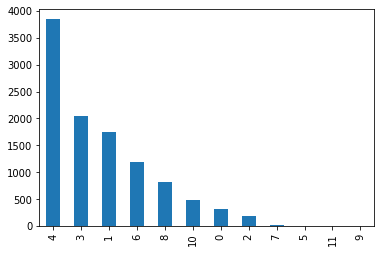

In [31]:
# using bar-plot

data['Name'].value_counts().plot(kind = 'bar')

### Tranforming From and To

In [32]:
# Checking for unique Value in From column

From = data['From'].unique()
From

array(['Banglore', 'Delhi', 'Chennai', 'Mumbai', 'Kolkata'], dtype=object)

In [33]:
# Checking for unique Value in From column

To = data['To'].unique()
To

array(['New Delhi', 'Cochin', 'Kolkata', 'Hyderabad', 'Banglore', 'Delhi'],
      dtype=object)

In [34]:
# sorting From and To for label assignments

From.sort()
print(From)

To.sort()
print(To)

['Banglore' 'Chennai' 'Delhi' 'Kolkata' 'Mumbai']
['Banglore' 'Cochin' 'Delhi' 'Hyderabad' 'Kolkata' 'New Delhi']


In [35]:
# removing Duplicate New Delhi

To = To[:-1]

In [36]:
To

array(['Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata'],
      dtype=object)

In [37]:
data['To'] = dataframe['Destination']

In [38]:
data.head()

,Name,From,To,Route,Departure,Arrival,Time of Flight,Stops,Extra Services,Price
Date,,,,,,,,,,
2019-03-01,1,Banglore,NaN,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
2019-03-01,1,Banglore,NaN,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,1 stop,1 Long layover,14594
2019-03-01,4,Banglore,NaN,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,1 stop,1 Long layover,22270
2019-03-01,4,Banglore,NaN,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
2019-03-01,3,Banglore,NaN,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,12649


In [39]:
for _ in range(len(data['To'])):
    if data['To'][_] == 'New Delhi':
        data['To'][_] = 'Delhi'

In [40]:
data.head(500)

,Name,From,To,Route,Departure,Arrival,Time of Flight,Stops,Extra Services,Price
Date,,,,,,,,,,
2019-03-01,1,Banglore,NaN,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
2019-03-01,1,Banglore,NaN,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,1 stop,1 Long layover,14594
2019-03-01,4,Banglore,NaN,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,1 stop,1 Long layover,22270
2019-03-01,4,Banglore,NaN,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
2019-03-01,3,Banglore,NaN,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,12649
2019-03-01,4,Banglore,NaN,BLR → BOM → DEL,08:00,16:10,8h 10m,1 stop,No info,22270
2019-03-01,5,Banglore,NaN,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
2019-03-01,3,Banglore,NaN,BLR → HYD → DEL,12:10,17:05,4h 55m,1 stop,No info,9694
2019-03-01,1,Banglore,NaN,BLR → AMD → DEL,00:30,23:55,23h 25m,1 stop,1 Long layover,12599


In [41]:
# changing From and To datatype

data['From'] = data['From'].astype('category')
data['To'] = data['To'].astype('category')

In [42]:
# Label Encoding of From and To

data['From'] = data['From'].cat.codes
data['To'] = data['To'].cat.codes

In [43]:
# Checking for unique Value in From

data['From'].unique()

array([0, 2, 1, 4, 3], dtype=int64)

In [44]:
# Checking for unique Value in From

data['To'].unique()

array([-1], dtype=int64)

In [45]:
data.head()

,Name,From,To,Route,Departure,Arrival,Time of Flight,Stops,Extra Services,Price
Date,,,,,,,,,,
2019-03-01,1,0,-1,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
2019-03-01,1,0,-1,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,1 stop,1 Long layover,14594
2019-03-01,4,0,-1,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,1 stop,1 Long layover,22270
2019-03-01,4,0,-1,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
2019-03-01,3,0,-1,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,12649


#### From-Encode Dictionary

In [46]:
From_encode = {}

for _ in range(len(From)):
    From_encode[From[_]] = _
    
print(From_encode)

{'Banglore': 0, 'Chennai': 1, 'Delhi': 2, 'Kolkata': 3, 'Mumbai': 4}


#### Encode-from Dictionary

In [47]:
Encode_from = {}

for _ in range(len(From)):
    Encode_from[_] = From[_]
    
print(Encode_from)

{0: 'Banglore', 1: 'Chennai', 2: 'Delhi', 3: 'Kolkata', 4: 'Mumbai'}


#### To-Encode Dictionary

In [48]:
To_encode = {}

for _ in range(len(To)-1):
    To_encode[To[_]] = _
    
print(To_encode)

{'Banglore': 0, 'Cochin': 1, 'Delhi': 2, 'Hyderabad': 3}


#### Encode-to Dictionary

In [49]:
Encode_to = {}

for _ in range(len(To)):
    Encode_to[_] = To[_]
    
print(Encode_to)

{0: 'Banglore', 1: 'Cochin', 2: 'Delhi', 3: 'Hyderabad', 4: 'Kolkata'}


#### Visualising From

In [50]:
# frequency table for From

data['From'].value_counts()

2    4536
3    2871
0    2197
4     697
1     381
Name: From, dtype: int64

In [51]:
# in terms of percent

data['From'].value_counts() / len(data) * 100

2    42.463958
3    26.876989
0    20.567309
4     6.524995
1     3.566748
Name: From, dtype: float64

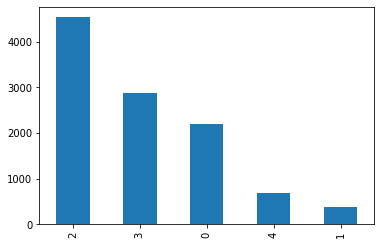

In [52]:
# using bar-plot

data['From'].value_counts().plot(kind = 'bar')

#### Visualising To

In [53]:
# frequency table for To

data['To'].value_counts()

-1    10682
Name: To, dtype: int64

In [54]:
# in terms of percent

data['To'].value_counts() / len(data) * 100

-1    100.0
Name: To, dtype: float64

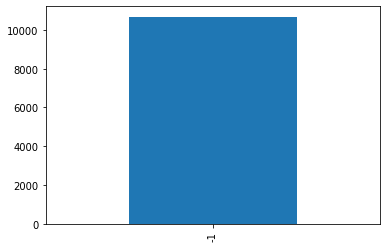

In [55]:
# using bar-plot

data['To'].value_counts().plot(kind = 'bar')

### Transforming Route

In [56]:
data['Route'].head()

Date
2019-03-01    BLR → BOM → AMD → DEL
2019-03-01          BLR → MAA → DEL
2019-03-01          BLR → BOM → DEL
2019-03-01          BLR → BOM → DEL
2019-03-01                BLR → DEL
Name: Route, dtype: object

In [57]:
# Checking unique Value

Route = data['Route'].unique()
Route

array(['BLR → BOM → AMD → DEL', 'BLR → MAA → DEL', 'BLR → BOM → DEL',
       'BLR → DEL', 'BLR → HYD → DEL', 'BLR → AMD → DEL',
       'BLR → CCU → DEL', 'BLR → VGA → DEL', 'BLR → VGA → HYD → DEL',
       'BLR → BOM → IDR → DEL', 'BLR → BOM → BHO → DEL',
       'BLR → PNQ → DEL', 'BLR → CCU → BBI → HYD → VGA → DEL',
       'BLR → CCU → BBI → DEL', 'BLR → BBI → DEL', 'BLR → GAU → DEL',
       'BLR → CCU → GAU → DEL', 'BLR → IDR → DEL',
       'BLR → VGA → VTZ → DEL', 'BLR → COK → DEL',
       'BLR → CCU → BBI → HYD → DEL', 'BLR → BDQ → DEL',
       'BLR → GOI → DEL', 'BLR → HYD → VGA → DEL', 'BLR → NAG → DEL',
       'BLR → BOM → NAG → DEL', 'BLR → HBX → BOM → AMD → DEL',
       'BLR → TRV → COK → DEL', 'BLR → HBX → BOM → NAG → DEL',
       'BLR → LKO → DEL', 'BLR → HBX → BOM → BHO → DEL',
       'BLR → BOM → UDR → DEL', 'BLR → STV → DEL',
       'BLR → BOM → JDH → DEL', 'DEL → BOM → COK', 'MAA → CCU',
       'BOM → HYD', 'DEL → HYD → MAA → COK', 'CCU → BLR',
       'DEL → HYD → COK', '

#### Route Dictionary

In [58]:
'Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'NewDelhi'

route_dictionary = {
    'Banglore_to_Cochin': [], 
    'Banglore_to_Delhi': [],
    'Banglore_to_Hyderabad': [],
    'Banglore_to_Kolkata': [],
    
    'Chennai_to_Banglore': [],
    'Chennai_to_Cochin': [],
    'Chennai_to_Delhi': [],
    'Chennai_to_Hyderabad': [],
    'Chennai_to_Kolkata': [],
    
    'Delhi_to_Cochin': [],
    'Delhi_to_Banglore': [],
    'Delhi_to_Hyderabad': [],
    'Delhi_to_Kolkata': [],
    
    'Kolkata_to_Cochin': [],
    'Kolkata_to_Banglore': [],
    'Kolkata_to_Delhi': [],
    'Kolkata_to_Hyderabad': [],
    
    'Mumbai_to_Banglore':[],
    'Mumbai_to_Cochin':[],
    'Mumbai_to_Delhi':[],
    'Mumbai_to_Hyderabad':[],
    'Mumbai_to_Kolkata':[],
    
}

In [59]:
# Route[0].astype(str)

for r in Route:
    print(type(r[:3]))
    if r[:3] == 'BLR' and r[-3:] == 'COK':
        print('HELLO')

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [60]:
for r in Route:
    if r[:3] == 'BLR' and r[-3:] == 'COK':
        route_dictionary['Banglore_to_Cochin'].append(r)
    elif r[:3] == 'BLR' and r[-3:] == 'DEL':
        route_dictionary['Banglore_to_Delhi'].append(r)
    elif r[:3] == 'BLR' and r[-3:] == 'HYD':
        route_dictionary['Banglore_to_Hyderabad'].append(r)
    elif r[:3] == 'BLR' and r[-1:] == 'CCU':
        route_dictionary['Banglore_to_Kolkata'].append(r)
    
    elif r[:3] == 'MAA' and r[-3:] == 'BLR':
        route_dictionary['Chennai_to_Banglore'].append(r)
    elif r[:3] == 'MAA' and r[-3:] == 'COK':
        route_dictionary['Chennai_to_Cochin'].append(r)
    elif r[:3] == 'MAA' and r[-3:] == 'DEL':
        route_dictionary['Chennai_to_Delhi'].append(r)
    elif r[:3] == 'MAA' and r[-1:] == 'HYD':
        route_dictionary['Chennai_to_Hyderabad'].append(r)
    elif r[:3] == 'MAA' and r[-1:] == 'CCU':
        route_dictionary['Chennai_to_Kolkata'].append(r)
        
    elif r[:3] == 'DEL' and r[-3:] == 'BLR':
        route_dictionary['Delhi_to_Banglore'].append(r)
    elif r[:3] == 'DEL' and r[-3:] == 'COK':
        route_dictionary['Delhi_to_Cochin'].append(r)
    elif r[:3] == 'DEL' and r[-3:] == 'CCU':
        route_dictionary['Delhi_to_Kolkata'].append(r)
    elif r[:3] == 'DEL' and r[-1:] == 'HYD':
        route_dictionary['Delhi_to_Hyderabad'].append(r)
    
    elif r[:3] == 'CCU' and r[-3:] == 'BLR':
        route_dictionary['Kolkata_to_Banglore'].append(r)
    elif r[:3] == 'CCU' and r[-3:] == 'COK':
        route_dictionary['Kolkata_to_Cochin'].append(r)
    elif r[:3] == 'CCU' and r[-3:] == 'DEL':
        route_dictionary['Kolkata_to_Delhi'].append(r)
    elif r[:3] == 'CCU' and r[-1:] == 'HYD':
        route_dictionary['Kolkata_to_Hyderabad'].append(r)
    
    elif r[:3] == 'BOM' and r[-3:] == 'BLR':
        route_dictionary['Mumbai_to_Banglore'].append(r)
    elif r[:3] == 'BOM' and r[-3:] == 'COK':
        route_dictionary['Mumbai_to_Cochin'].append(r)
    elif r[:3] == 'BOM' and r[-3:] == 'DEL':
        route_dictionary['Mumbai_to_Delhi'].append(r)
    elif r[:3] == 'BOM' and r[-1:] == 'HYD':
        route_dictionary['Mumbai_to_Hyderabad'].append(r)
    elif r[:3] == 'BOM' and r[-1:] == 'CCU':
        route_dictionary['Mumbai_to_Kolkata'].append(r)
        
#     print(route_dictionary)

In [61]:
route_dictionary

{'Banglore_to_Cochin': [],
 'Banglore_to_Delhi': ['BLR → BOM → AMD → DEL',
  'BLR → MAA → DEL',
  'BLR → BOM → DEL',
  'BLR → DEL',
  'BLR → HYD → DEL',
  'BLR → AMD → DEL',
  'BLR → CCU → DEL',
  'BLR → VGA → DEL',
  'BLR → VGA → HYD → DEL',
  'BLR → BOM → IDR → DEL',
  'BLR → BOM → BHO → DEL',
  'BLR → PNQ → DEL',
  'BLR → CCU → BBI → HYD → VGA → DEL',
  'BLR → CCU → BBI → DEL',
  'BLR → BBI → DEL',
  'BLR → GAU → DEL',
  'BLR → CCU → GAU → DEL',
  'BLR → IDR → DEL',
  'BLR → VGA → VTZ → DEL',
  'BLR → COK → DEL',
  'BLR → CCU → BBI → HYD → DEL',
  'BLR → BDQ → DEL',
  'BLR → GOI → DEL',
  'BLR → HYD → VGA → DEL',
  'BLR → NAG → DEL',
  'BLR → BOM → NAG → DEL',
  'BLR → HBX → BOM → AMD → DEL',
  'BLR → TRV → COK → DEL',
  'BLR → HBX → BOM → NAG → DEL',
  'BLR → LKO → DEL',
  'BLR → HBX → BOM → BHO → DEL',
  'BLR → BOM → UDR → DEL',
  'BLR → STV → DEL',
  'BLR → BOM → JDH → DEL',
  'BLR → BOM → IDR → GWL → DEL',
  'BLR → BOM → IXC → DEL'],
 'Banglore_to_Hyderabad': [],
 'Banglore_to_K

In [62]:
s = 0
for d in route_dictionary:
    s+=len(route_dictionary[d])

print(s)

104


In [63]:
# finding max Stops

max_stops = 0
for r in Route:
    stops = r.split(' → ')
    if len(stops) > max_stops:
        max_stops = len(stops)

print(max_stops)

6


In [64]:
# creating encoded_route column

data['Encoded Route'] = data['Route'].astype('category')

In [65]:
# Label Encoding of Name

data['Encoded Route'] = data['Encoded Route'].cat.codes

In [66]:
data.head()

,Name,From,To,Route,Departure,Arrival,Time of Flight,Stops,Extra Services,Price,Encoded Route
Date,,,,,,,,,,,
2019-03-01,1,0,-1,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135,3
2019-03-01,1,0,-1,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,1 stop,1 Long layover,14594,28
2019-03-01,4,0,-1,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,1 stop,1 Long layover,22270,5
2019-03-01,4,0,-1,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890,5
2019-03-01,3,0,-1,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,12649,18


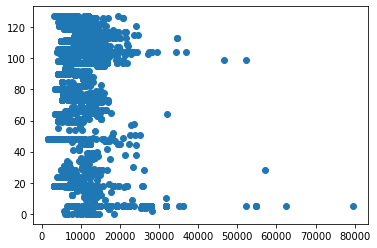

In [67]:
plt.scatter(data['Price'], data['Encoded Route'])

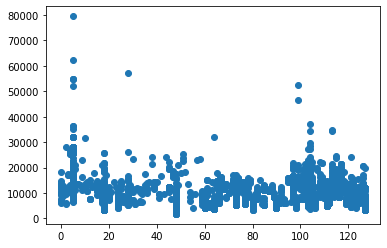

In [68]:
plt.scatter(data['Encoded Route'], data['Price'])

In [69]:
df_price = data[data.Price <= 20000]

df_price.head()

,Name,From,To,Route,Departure,Arrival,Time of Flight,Stops,Extra Services,Price,Encoded Route
Date,,,,,,,,,,,
2019-03-01,1,0,-1,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135,3
2019-03-01,1,0,-1,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,1 stop,1 Long layover,14594,28
2019-03-01,3,0,-1,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,12649,18
2019-03-01,3,0,-1,BLR → HYD → DEL,12:10,17:05,4h 55m,1 stop,No info,9694,24
2019-03-01,1,0,-1,BLR → AMD → DEL,00:30,23:55,23h 25m,1 stop,1 Long layover,12599,0


In [70]:
# plt.scatter(df_price['Price'], data['Encoded Route'])

In [71]:
data['Price'].isnull().sum()

0

### Transforming Time of Flight to Duration

In [72]:
# data.drop(columns='Duration', inplace=True)

In [73]:
# # creating duration Columns 

# data['Duration'] = None

In [74]:
data.head()

,Name,From,To,Route,Departure,Arrival,Time of Flight,Stops,Extra Services,Price,Encoded Route
Date,,,,,,,,,,,
2019-03-01,1,0,-1,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135,3
2019-03-01,1,0,-1,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,1 stop,1 Long layover,14594,28
2019-03-01,4,0,-1,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,1 stop,1 Long layover,22270,5
2019-03-01,4,0,-1,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890,5
2019-03-01,3,0,-1,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,12649,18


In [75]:
data.head()

,Name,From,To,Route,Departure,Arrival,Time of Flight,Stops,Extra Services,Price,Encoded Route
Date,,,,,,,,,,,
2019-03-01,1,0,-1,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135,3
2019-03-01,1,0,-1,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,1 stop,1 Long layover,14594,28
2019-03-01,4,0,-1,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,1 stop,1 Long layover,22270,5
2019-03-01,4,0,-1,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890,5
2019-03-01,3,0,-1,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,12649,18


### Transforming Stops

In [76]:
# Checking unique Value

Stops = data['Stops'].unique()
Stops

array(['2 stops', '1 stop', 'non-stop', '4 stops', '3 stops'],
      dtype=object)

In [77]:
# changing stops datatype

data['Stops'] = data['Stops'].astype('category')

In [78]:
# Label Encoding of Name

data['Stops'] = data['Stops'].cat.codes

In [79]:
# Checking for unique Value

data['Stops'].unique()

array([1, 0, 4, 3, 2], dtype=int64)

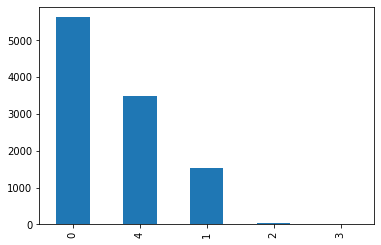

In [80]:
# using bar-plot

data['Stops'].value_counts().plot(kind = 'bar')

In [81]:
data.head()

,Name,From,To,Route,Departure,Arrival,Time of Flight,Stops,Extra Services,Price,Encoded Route
Date,,,,,,,,,,,
2019-03-01,1,0,-1,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,1,No info,17135,3
2019-03-01,1,0,-1,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,0,1 Long layover,14594,28
2019-03-01,4,0,-1,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,0,1 Long layover,22270,5
2019-03-01,4,0,-1,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,0,No info,26890,5
2019-03-01,3,0,-1,BLR → DEL,18:25,21:20,2h 55m,4,No info,12649,18


### Transforming Extra Services

In [82]:
# Checking unique Value

Extra_services = data['Extra Services'].unique()
Extra_services

array(['No info', '1 Long layover', 'Business class', 'Red-eye flight',
       'Change airports', '2 Long layover', 'No Info', '1 Short layover',
       'In-flight meal not included', 'No check-in baggage included'],
      dtype=object)

In [83]:
# changing Extra Services datatype

data['Extra Services'] = data['Extra Services'].astype('category')

In [84]:
# Label Encoding of Name

data['Extra Services'] = data['Extra Services'].cat.codes

In [85]:
# Checking for unique Value

data['Extra Services'].unique()

array([8, 0, 3, 9, 4, 2, 6, 1, 5, 7], dtype=int64)

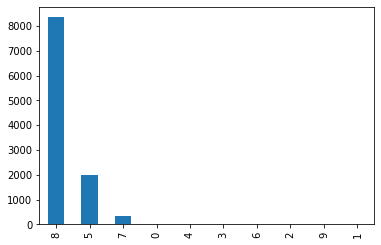

In [86]:
# using bar-plot

data['Extra Services'].value_counts().plot(kind = 'bar')

In [87]:
data.head()

,Name,From,To,Route,Departure,Arrival,Time of Flight,Stops,Extra Services,Price,Encoded Route
Date,,,,,,,,,,,
2019-03-01,1,0,-1,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,1,8,17135,3
2019-03-01,1,0,-1,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,0,0,14594,28
2019-03-01,4,0,-1,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,0,0,22270,5
2019-03-01,4,0,-1,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,0,8,26890,5
2019-03-01,3,0,-1,BLR → DEL,18:25,21:20,2h 55m,4,8,12649,18


### Transforming Price

In [88]:
# changing Price datatype

data['Price'] = data['Price'].astype('float64')

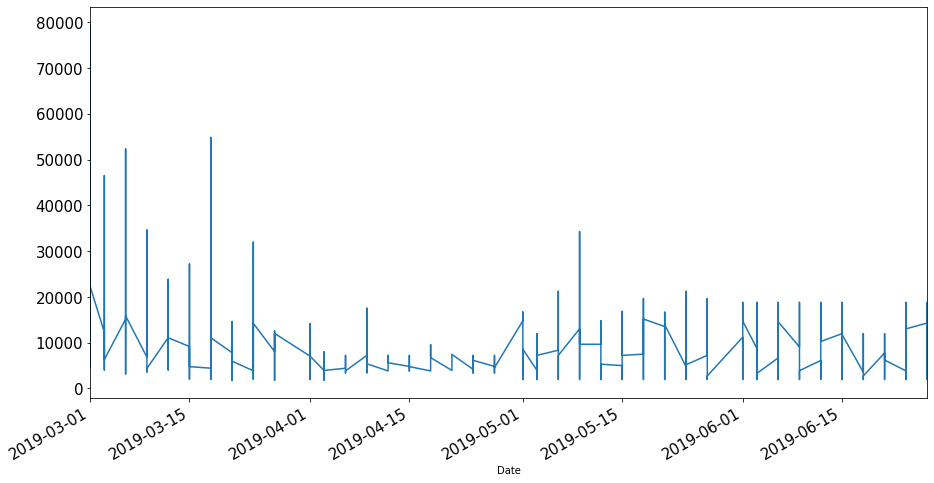

In [89]:
data['Price'].plot(fontsize=15, figsize=(15,8))

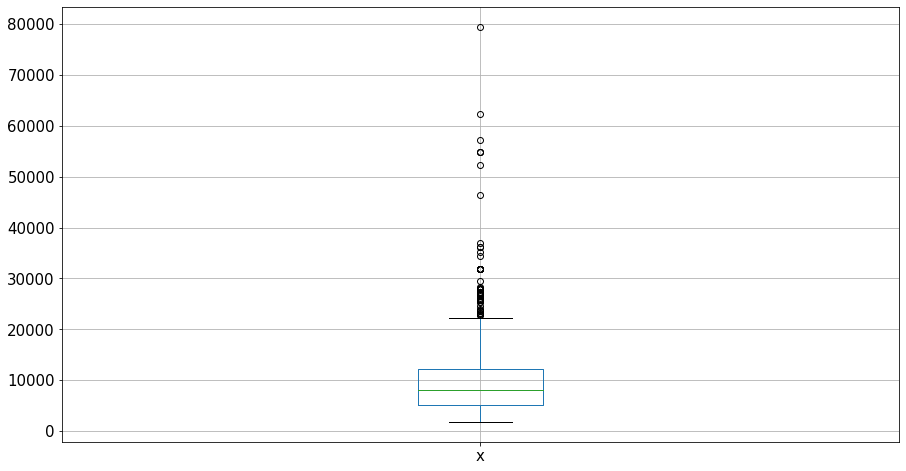

In [90]:
# Checking outliers by Box plot

pd.DataFrame.boxplot(data.Price[:8000], fontsize=15, figsize=(15,8))

In [91]:
data.tail()

,Name,From,To,Route,Departure,Arrival,Time of Flight,Stops,Extra Services,Price,Encoded Route
Date,,,,,,,,,,,
2019-06-09,4,3,-1,CCU → DEL → BLR,09:35,22:05,12h 30m,0,8,14676.0,73
2019-06-09,4,3,-1,CCU → DEL → BLR,20:25,21:05 10 Jun,24h 40m,0,5,10539.0,73
2019-06-09,10,3,-1,CCU → DEL → BLR,20:20,23:25 10 Jun,27h 5m,0,8,8085.0,73
2019-06-09,2,0,-1,BLR → DEL,07:45,10:40,2h 55m,4,8,3898.0,18
2019-06-09,1,2,-1,DEL → HYD → MAA → COK,09:45,09:25 10 Jun,23h 40m,1,8,11185.0,112


## Multivariate Analysis

### Correlation

In [92]:
# finding the correlation between it's attributes using pearson method

data.corr(method ='pearson')

,Name,From,To,Stops,Extra Services,Price,Encoded Route
Name,1.000000,-0.013397,NaN,0.035973,-0.060748,-0.039565,0.025214
From,-0.013397,1.000000,NaN,-0.225605,-0.022109,0.015999,0.403412
To,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stops,0.035973,-0.225605,NaN,1.000000,0.164054,-0.571221,-0.437749
Extra Services,-0.060748,-0.022109,NaN,0.164054,1.000000,-0.065463,0.035152
Price,-0.039565,0.015999,NaN,-0.571221,-0.065463,1.000000,0.164149
Encoded Route,0.025214,0.403412,NaN,-0.437749,0.035152,0.164149,1.000000


In [93]:
# finding the correlation between it's attributes using kendall method

data.corr(method ='kendall')

,Name,From,To,Stops,Extra Services,Price,Encoded Route
Name,1.000000,-0.006631,NaN,-0.126630,-0.204717,0.074030,0.056919
From,-0.006631,1.000000,NaN,-0.145701,-0.039532,0.025815,-0.057998
To,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Stops,-0.126630,-0.145701,NaN,1.000000,0.118233,-0.427812,-0.255017
Extra Services,-0.204717,-0.039532,NaN,0.118233,1.000000,-0.011668,0.026926
Price,0.074030,0.025815,NaN,-0.427812,-0.011668,1.000000,0.166375
Encoded Route,0.056919,-0.057998,NaN,-0.255017,0.026926,0.166375,1.000000


In [94]:
# finding the correlation between it's attributes using spearman method

data.corr(method ='spearman')

,Name,From,To,Stops,Extra Services,Price,Encoded Route
Name,1.000000,-0.004806,NaN,-0.145853,-0.240700,0.101895,0.070869
From,-0.004806,1.000000,NaN,-0.158504,-0.043857,0.030265,0.090815
To,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stops,-0.145853,-0.158504,NaN,1.000000,0.126522,-0.569479,-0.330854
Extra Services,-0.240700,-0.043857,NaN,0.126522,1.000000,-0.014616,0.033651
Price,0.101895,0.030265,NaN,-0.569479,-0.014616,1.000000,0.245012
Encoded Route,0.070869,0.090815,NaN,-0.330854,0.033651,0.245012,1.000000


In [95]:
correlations = data.corr()
correlations

,Name,From,To,Stops,Extra Services,Price,Encoded Route
Name,1.000000,-0.013397,NaN,0.035973,-0.060748,-0.039565,0.025214
From,-0.013397,1.000000,NaN,-0.225605,-0.022109,0.015999,0.403412
To,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stops,0.035973,-0.225605,NaN,1.000000,0.164054,-0.571221,-0.437749
Extra Services,-0.060748,-0.022109,NaN,0.164054,1.000000,-0.065463,0.035152
Price,-0.039565,0.015999,NaN,-0.571221,-0.065463,1.000000,0.164149
Encoded Route,0.025214,0.403412,NaN,-0.437749,0.035152,0.164149,1.000000


In [96]:
correlations.style.background_gradient(cmap='coolwarm')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Name,From,To,Stops,Extra Services,Price,Encoded Route
Name,1,-0.013397,nan,0.0359727,-0.0607477,-0.0395648,0.0252143
From,-0.013397,1,nan,-0.225605,-0.0221088,0.0159992,0.403412
To,nan,nan,nan,nan,nan,nan,nan
Stops,0.0359727,-0.225605,nan,1,0.164054,-0.571221,-0.437749
Extra Services,-0.0607477,-0.0221088,nan,0.164054,1,-0.0654625,0.0351522
Price,-0.0395648,0.0159992,nan,-0.571221,-0.0654625,1,0.164149
Encoded Route,0.0252143,0.403412,nan,-0.437749,0.0351522,0.164149,1


### Visualising Overall Dataset Property

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left == right == -1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom == top == -1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:100: UserWarning: Attempting to set identical left == right == -1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


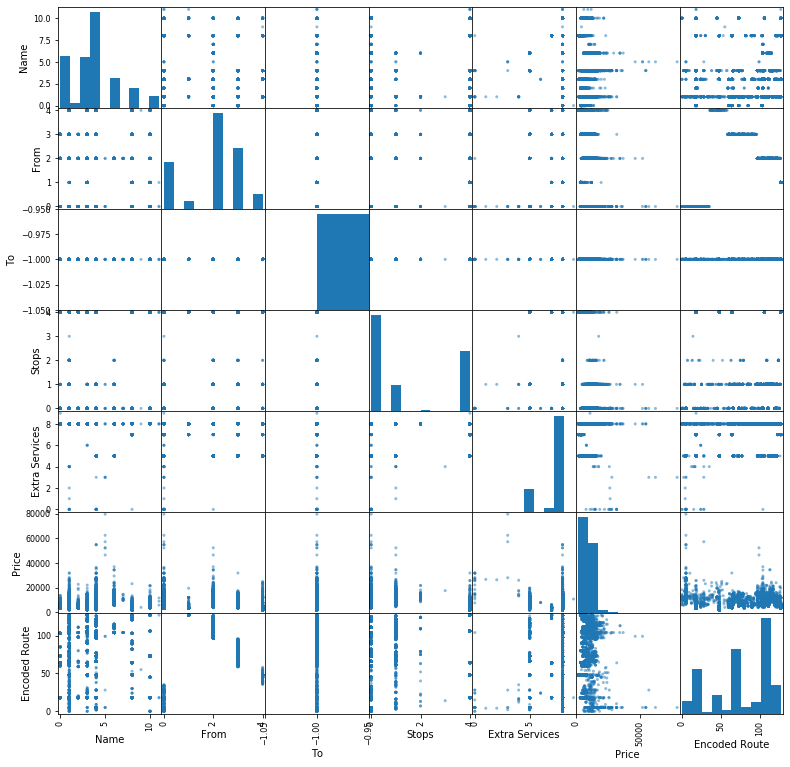

In [97]:
pd.plotting.scatter_matrix(data, figsize=(13,13))
plt.show()

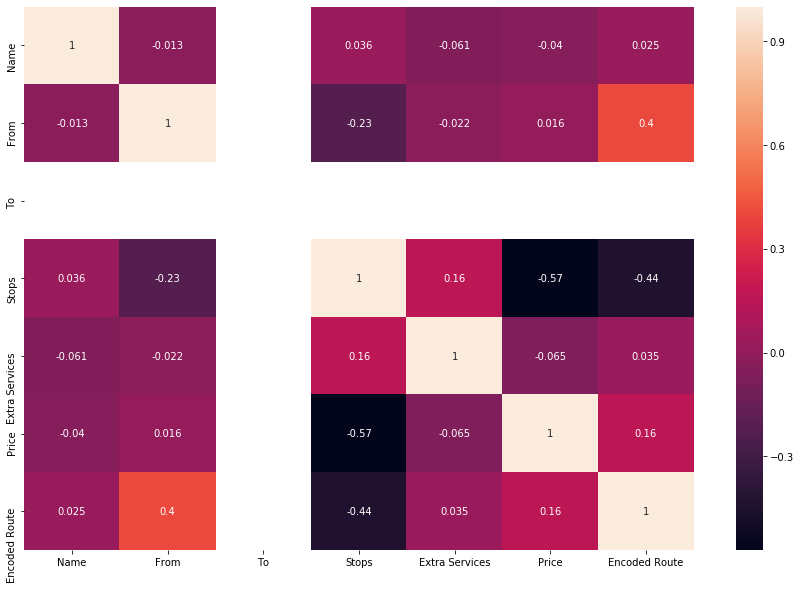

In [98]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


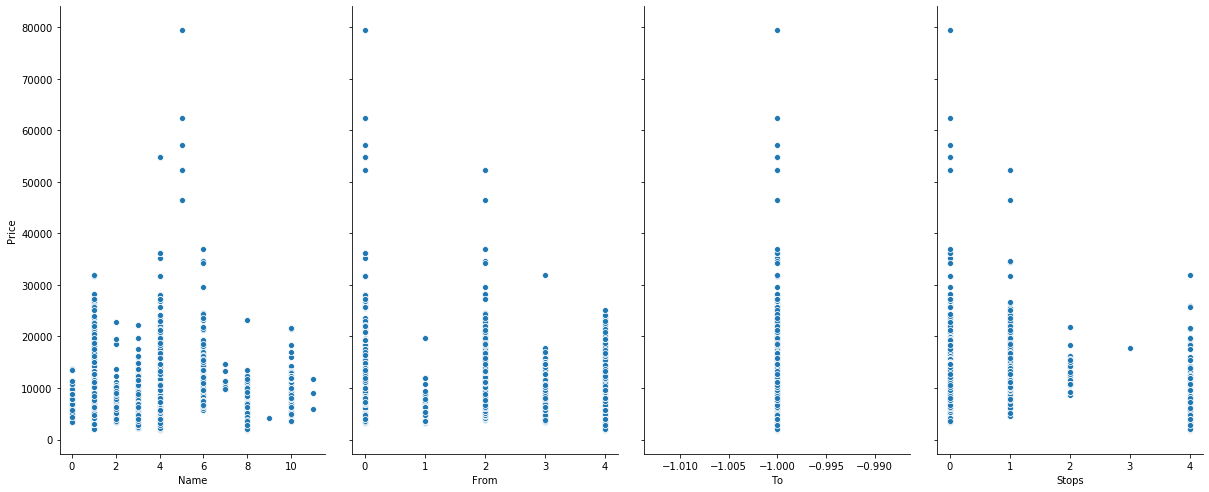

In [99]:
# visualize the relationship between the features and the response using scatterplots

sns.pairplot(data, x_vars=['Name', 'From', 'To', 'Stops'], y_vars='Price', size=7, aspect=0.6)

KeyError: 'Duration'

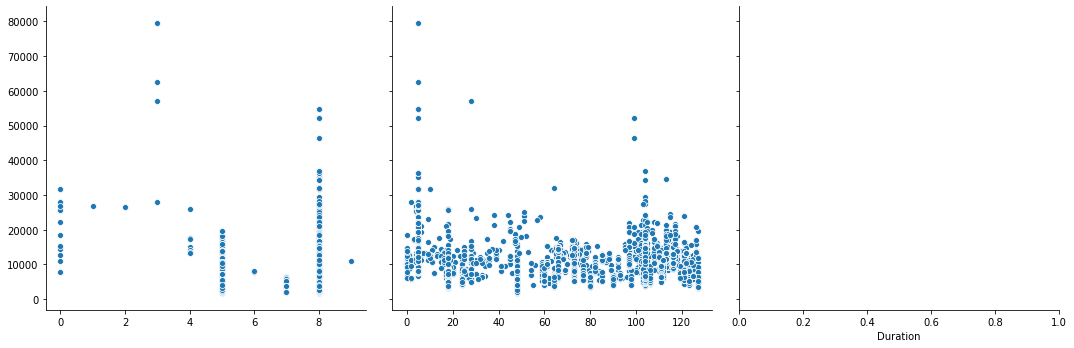

In [100]:
# visualize the relationship between the features and the response using scatterplots

sns.pairplot(data, x_vars=['Extra Services', 'Encoded Route', 'Duration'], y_vars='Price', size=5, aspect=1)

In [ ]:
# describes only continuous variable

data.describe()

In [ ]:
# describes all variable

data.describe(include='all')

## Saving Pre-Processed data

In [ ]:
writer = pd.ExcelWriter("C:\\Users\\Ashutosh Kumar Singh\\PythonTraining\\flight raw\\Processed_Flight_data.xlsx")
data.to_excel(writer,'Sheet1')
writer.save()

## Normalization

In [ ]:
data_2 = data.copy(deep=True)
data_2.head()

In [ ]:
data_2.drop(columns=['Route','Departure','Arrival','Time of Flight'], inplace=True)

In [ ]:
data_2.head()

In [ ]:
normalized_data = ((data_2-data_2.min())/(data_2.max()-data_2.min()))
normalized_data.head()

In [ ]:
corr = normalized_data.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
writer = pd.ExcelWriter("C:\\Users\\Ashutosh Kumar Singh\\PythonTraining\\flight raw\\Normalized_Flight_data.xlsx")
normalized_data.to_excel(writer,'Sheet1')
writer.save()